# Programming for Data Analysis Project

Notebook for the Project for Programming for Data Analysis module @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Machine-Learning-Tasks-2020)

***

#### — Problem statement
*For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the **numpy.random** package for this purpose.*

*Specifically, in this project you should:*

• *Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*

• *Investigate the types of variables involved, their likely distributions, and their relationships with each other.*

• *Synthesise/simulate a data set as closely matching their properties as possible.*

• *Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*

*Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.*

***

#### — Cardiovascular diseases 

![Cardiovascular diseases](https://www.clearlake-specialties.com/wp-content/uploads/SystolicDiastolic_Heartfailure.5518685646fab-e1553788922847.png)

>Cardiovascular disease (CVD) is a general term for a disease of the heart or blood vessels. Blood flow to the heart, brain or body is reduced because of: a blood clot (thrombosis) a build-up of fatty deposits inside an artery, leading to hardening and narrowing of the artery (atherosclerosis). **Main Risk Factors: High blood pressure; Tobacco smoking; Diabetes** — [HSE](https://www.hse.ie/eng/health/az/c/cardiovascular-disease)

#### — Introduction

**Dataset description:**

>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
>
>Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
>
>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


#### — Content

1. Age: Age of the patient, *Measurement: Years [40 - 95]*

2. Anemia: Decrease of red blood cells or hemoglobin, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

3. High blood pressure: If a patient has hypertension, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

4. Creatinine phosphokinase (CPK): evel of the CPK enzyme in the blood, *Measurement: mcg/L  [23 - 7861]**

5. Diabetes: If the patient has diabetes, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

6. Ejection fraction: Percentage of blood leaving, *Measurement: Percentage [14 - 80]*

7. Sex : Woman or man, *Measurement: Binary [0, 1], Female = 0, Male = 1*

8. Platelets: Platelets in the blood, *Measurement: kiloplatelets/mL [25.01 - 850.00]**

9. Serum creatinine : Level of creatinine in the blood, *Measurement: mg/dL [0.50 - 9.40]**

10. Serum sodium: Level of sodium in the blood, *Measurement: mEq/L [114 - 148]**

11. Smoking: If the patient smokes, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

12. Time: Follow-up period, *Measurement: Days [4 - 285]*

13. Death event: If the patient died during the follow-up period, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

**mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre*<br>




#### — Packages

In [1]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

rng = np.random.default_rng(5)

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### — Dataset

Imported Heart Failure dataset contains 299 records and 13 features. The features include sex, age, some risk factors associated to cardiovascular disease such as diabetes, high blood pressure etc., some cardiovascular metrics and death event details. Among all of them some are boolean and some measurement values.

In [2]:
# Load dataset.
df = pd.read_csv("heart.csv")

In [4]:
# Preview of dataset.
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,75.0,55.00,65.0,50.0,65.0,90.0,75.0,60.0,65.00,80.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0,246.0,315.0,157.00,123.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0,15.0,60.0,65.00,35.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0,127000.0,454000.0,263358.03,388000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1,1.2,1.1,1.50,9.4
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0,137.0,131.0,138.00,133.0
sex,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.00,1.0


In [5]:
# Print metadata about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Shape of dataset.
df.shape

(299, 13)

In [7]:
# Have a look at some basic statistical details.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### — Standard Missing values

In [8]:
# check if dataset contains any missing values.
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### — Non-Standard Missing values

In [9]:
# check if dataset contains any missing values according to specified list.
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('heart.csv', na_values=missing_values)
df.isna().sum().sum()

0

#### — Negative values

In [10]:
# checks if dataset contains any negative values
df[(df.iloc[:,:] < 0)].sum()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64


Knowing that there are no negative or standard and non-standard missing values in dataset let's have a look at distribution of features and their correlation and how can they might have determine dependence among the other.


In [11]:
# Use Pandas corr() function to check correlations between features.
corr = df.iloc[:,:].corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


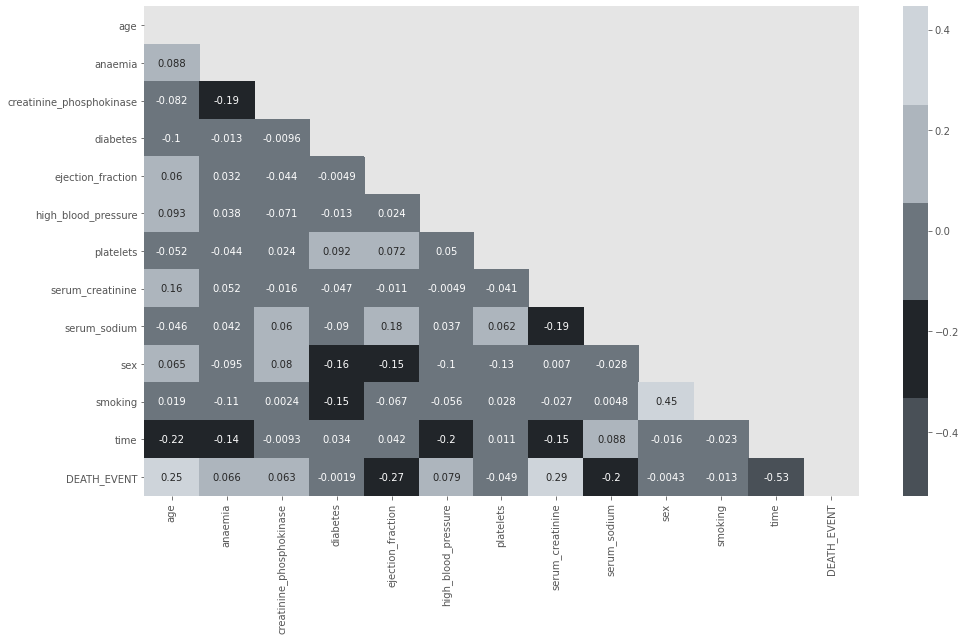

In [12]:
# For better overview of the correlation among all features let's visualize them using Seaborn heatmap.
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, annot=True, cmap=cmap);


Looking at the correlation matrix above, it clearly shows that there is no major correlation between features of dataset. Higher correlation can be noticeably observed between pairs of sex and smoking as well as age and death event. Let's check the histograms for those pairs.


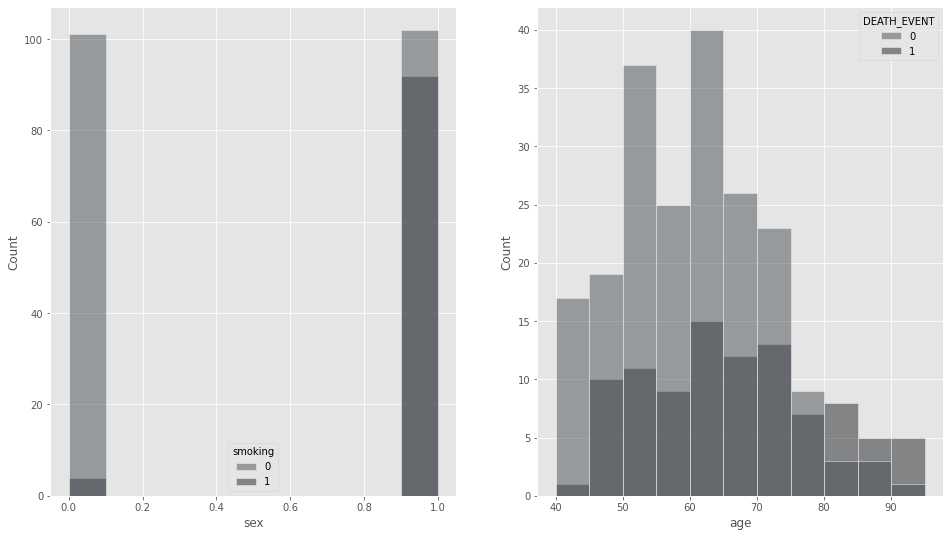

In [73]:
# Draw the plots for the most highest correlated pairs.
fig, axes = plt.subplots(1, 2)
sns.histplot(df, x="sex", hue="smoking", ax=axes[0]);
sns.histplot(df, x="age", hue="DEATH_EVENT", bins=11, ax=axes[1]);

In [40]:
df['smoking'].value_counts()/len(df['smoking'])

0    0.67893
1    0.32107
Name: smoking, dtype: float64

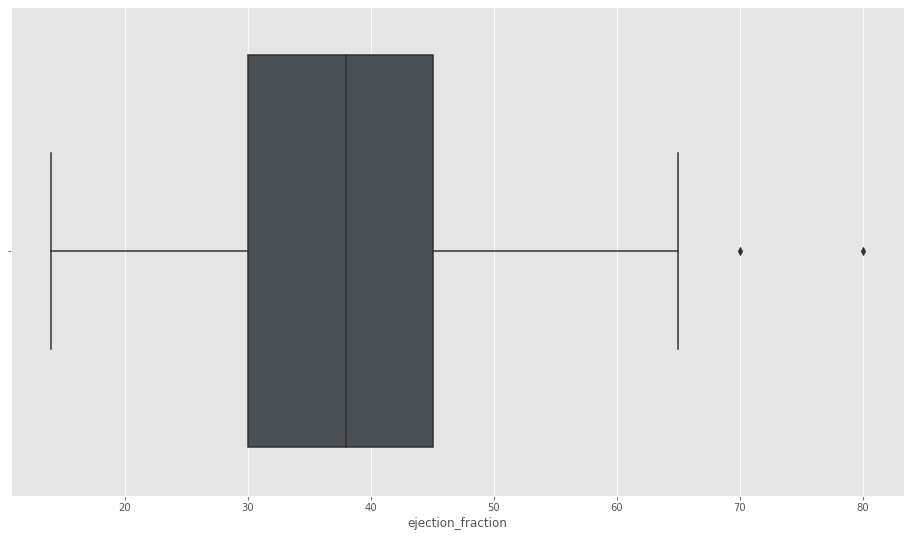

In [69]:
sns.boxplot(data=df, x=df['ejection_fraction']);

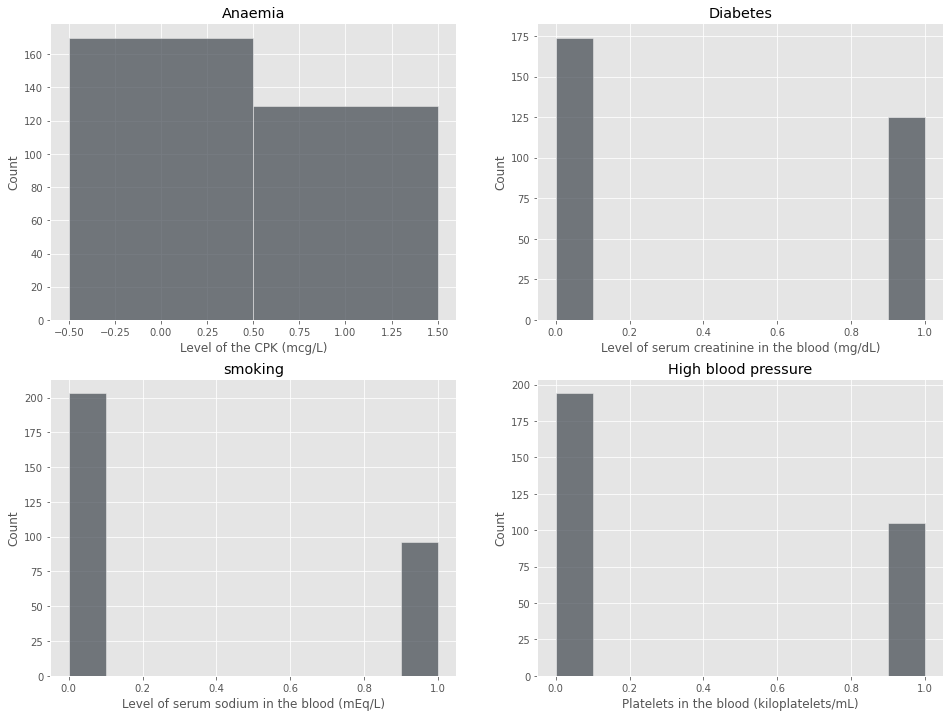

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
sns.histplot(df, x="anaemia", discrete=True, ax=axes[0,0]).set(title='Anaemia', xlabel="Level of the CPK (mcg/L)");
sns.histplot(df, x="diabetes", ax=axes[0,1]).set(title='Diabetes', xlabel="Level of serum creatinine in the blood (mg/dL)");
sns.histplot(df, x="smoking", ax=axes[1,0]).set(title='smoking', xlabel="Level of serum sodium in the blood (mEq/L)");
sns.histplot(df, x="high_blood_pressure", ax=axes[1,1]).set(title='High blood pressure', xlabel="Platelets in the blood (kiloplatelets/mL)");

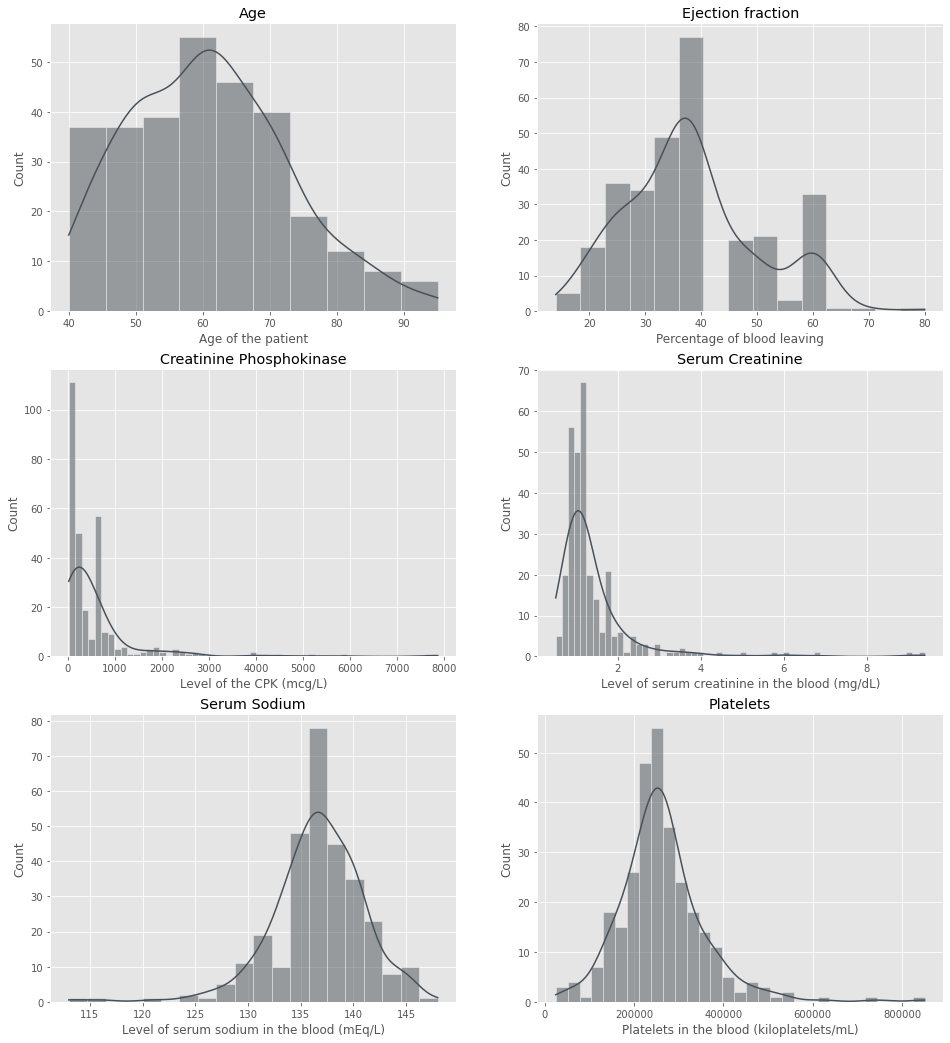

In [52]:
fig, axes = plt.subplots(3, 2, figsize=(16,18))
sns.histplot(df.age, kde=True, ax=axes[0,0]).set(title='Age', xlabel="Age of the patient");
sns.histplot(df.ejection_fraction, kde=True, ax=axes[0,1]).set(title='Ejection fraction', xlabel="Percentage of blood leaving");
sns.histplot(df.creatinine_phosphokinase, kde=True, ax=axes[1,0]).set(title='Creatinine Phosphokinase', xlabel="Level of the CPK (mcg/L)");
sns.histplot(df.serum_creatinine, kde=True, ax=axes[1,1]).set(title='Serum Creatinine', xlabel="Level of serum creatinine in the blood (mg/dL)");
sns.histplot(df.serum_sodium, kde=True, ax=axes[2,0]).set(title='Serum Sodium', xlabel="Level of serum sodium in the blood (mEq/L)");
sns.histplot(df.platelets, kde=True, ax=axes[2,1]).set(title='Platelets', xlabel="Platelets in the blood (kiloplatelets/mL)");